# ÏúÑÍ∏∞ Ïú†ÌòïÎ≥Ñ Í∞ÄÎßπÏ†ê Î∂ÑÎ•ò ÏãúÏä§ÌÖú

## Î™©Ìëú
- All Interval Features Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†êÏùÑ **5Í∞ÄÏßÄ ÏúÑÍ∏∞ Ïú†Ìòï**ÏúºÎ°ú ÏûêÎèô Î∂ÑÎ•ò
- Ïú†ÌòïÎ≥Ñ ÎßûÏ∂§Ìòï Í∏àÏúµÏÉÅÌíà Î∞è Í∞úÏûÖ Ï†ÑÎûµ Ï†úÏïà
- SHAP Î∂ÑÏÑùÏùÑ ÌÜµÌïú Ïú†ÌòïÎ≥Ñ ÏúÑÌóò ÏöîÏù∏ ÌååÏïÖ

## 5Í∞ÄÏßÄ ÏúÑÍ∏∞ Ïú†Ìòï
1. **Îß§Ï∂ú Í∏âÎùΩÌòï**: Ïó∞ÏÜç ÌïòÎùΩ 3Í∞úÏõî Ïù¥ÏÉÅ, ÌïòÎùΩ ÏÜçÎèÑ Îπ†Î¶Ñ
2. **Í≥†Í∞ù Ïù¥ÌÉàÌòï**: Ïû¨Î∞©Î¨∏Ïú® ÏßÄÏÜç ÌïòÎùΩ, Ïã†Í∑ú Í≥†Í∞ù Ïú†ÏûÖ Í∞êÏÜå
3. **Î∞∞Îã¨ ÏùòÏ°¥Ìòï**: Î∞∞Îã¨ ÎπÑÏú® Ï¶ùÍ∞Ä + Ï¥ù Îß§Ï∂ú Í∞êÏÜå
4. **Í≤ΩÏüÅ Ïó¥ÏúÑÌòï**: ÏóÖÏ¢Ö/ÏÉÅÍ∂å ÏàúÏúÑ ÏßÄÏÜç ÌïòÎùΩ
5. **Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï**: Îß§Ï∂ú+Í≥†Í∞ù ÎèôÏãú ÌïòÎùΩ, Ïó≠ÎåÄ ÏµúÏïÖ ÎèÑÎã¨

## 1. ÌôòÍ≤Ω ÏÑ§Ï†ï

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# Ï∂úÎ†• ÏÑ§Ï†ï
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

print("‚úÖ Libraries loaded successfully")

‚úÖ Libraries loaded successfully


## 2. Îç∞Ïù¥ÌÑ∞ Î∞è Î™®Îç∏ Î°úÎìú

In [19]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (All Interval Features Ìè¨Ìï®)
data_path = Path('../data/processed/featured_data_with_intervals.csv')
df = pd.read_csv(data_path)

print(f"‚úÖ Loaded data shape: {df.shape}")
print(f"Date range: {df['TA_YM'].min()} ~ {df['TA_YM'].max()}")

‚úÖ Loaded data shape: (86590, 148)
Date range: 202301 ~ 202412


In [20]:
# Interval feature Î™©Î°ù Î°úÎìú
with open('../data/processed/interval_feature_list.json', 'r') as f:
    interval_features_info = json.load(f)

print(f"‚úÖ Total interval features: {interval_features_info['total_features']}")
print(f"  - Decline features: {len(interval_features_info['decline_features'])}")
print(f"  - Historical worst features: {len(interval_features_info['historical_worst_features'])}")
print(f"  - Recovery features: {len(interval_features_info['recovery_features'])}")
print(f"  - Cross-metric features: {len(interval_features_info['cross_metric_features'])}")

‚úÖ Total interval features: 142
  - Decline features: 47
  - Historical worst features: 20
  - Recovery features: 28
  - Cross-metric features: 9


In [21]:
# Î™®Îç∏ Î∞è Feature Î™©Î°ù Î°úÎìú
model_dir = Path('../models')

# XGBoost Selected Interval Features Î™®Îç∏ (19 features)
with open(model_dir / 'xgboost_selected_interval.pkl', 'rb') as f:
    model = pickle.load(f)
print("‚úÖ Model loaded: XGBoost (Selected Interval Features)")

# Feature Î™©Î°ù Î°úÎìú
with open(model_dir / 'xgboost_selected_interval_info.json', 'r') as f:
    model_info = json.load(f)

feature_cols = model_info['features']
print(f"‚úÖ Feature columns: {len(feature_cols)}")

# Î™®Îç∏ ÏÑ±Îä• ÌôïÏù∏
print(f"\nModel Performance (Test Set):")
print(f"  ROC-AUC: {model_info['test_roc_auc']:.4f}")
print(f"  PR-AUC: {model_info['test_pr_auc']:.4f}")
print(f"  Detection Rate: {model_info['test_detection_rate']:.2%}")
print(f"  Feature breakdown: {model_info['feature_breakdown']}")

‚úÖ Model loaded: XGBoost (Selected Interval Features)
‚úÖ Feature columns: 19

Model Performance (Test Set):
  ROC-AUC: 0.6502
  PR-AUC: 0.0017
  Detection Rate: 27.27%
  Feature breakdown: {'decline': 10, 'worst': 4, 'cross': 3, 'recovery': 2}


## 3. ÏµúÏã† Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ Î∞è ÏúÑÌóòÎèÑ ÏòàÏ∏°

In [22]:
# ÏµúÏã† Ïõî Îç∞Ïù¥ÌÑ∞ (202412)
latest_month = df['TA_YM'].max()
print(f"Latest month: {latest_month}")

df_latest = df[df['TA_YM'] == latest_month].copy()
print(f"\nTotal merchants in {latest_month}: {len(df_latest):,}")

# ÏòÅÏóÖ Ï§ëÏù∏ Í∞ÄÎßπÏ†êÎßå ÌïÑÌÑ∞ÎßÅ (ÌèêÏóÖÏùºÏù¥ ÏóÜÎäî Í∞ÄÎßπÏ†ê)
df_active = df_latest[df_latest['MCT_ME_D'].isna()].copy()
print(f"Active merchants: {len(df_active):,}")
print(f"Closed merchants: {len(df_latest) - len(df_active):,}")

Latest month: 202412

Total merchants in 202412: 4,155
Active merchants: 4,058
Closed merchants: 97


In [23]:
# Feature Ï§ÄÎπÑ - Î™®Îç∏Ïù¥ ÌïôÏäµÌïú 19Í∞ú featuresÎßå ÏÇ¨Ïö©
print(f"Required features ({len(feature_cols)}):")
for i, f in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {f}")

# Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ìï¥Îãπ features Ï∂îÏ∂ú
X_active = df_active[feature_cols].copy()

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ (Ï§ëÏïôÍ∞í ÎåÄÏ≤¥)
X_active = X_active.fillna(X_active.median())

print(f"\nPrediction features shape: {X_active.shape}")
print(f"Missing values: {X_active.isnull().sum().sum()}")
print(f"‚úÖ Feature preparation completed")

Required features (19):
   1. RC_M1_TO_UE_CT_months_since_best
   2. RC_M1_SAA_at_worst_now
   3. RC_M1_SAA_consecutive_recovery
   4. RC_M1_AV_NP_AT_total_decline_6m
   5. RC_M1_AV_NP_AT_at_worst_now
   6. divergence_RC_M1_SAA_vs_RC_M1_AV_NP_AT
   7. RC_M1_TO_UE_CT_decline_count_12m
   8. RC_M1_TO_UE_CT_interval_volatility_6m
   9. divergence_RC_M1_SAA_vs_RC_M1_UE_CUS_CN
  10. RC_M1_SAA_decline_count_12m
  11. RC_M1_SAA_consecutive_declines
  12. RC_M1_AV_NP_AT_decline_count_12m
  13. RC_M1_AV_NP_AT_decline_count_6m
  14. RC_M1_SAA_decline_count_3m
  15. RC_M1_UE_CUS_CN_distance_from_best
  16. RC_M1_UE_CUS_CN_decline_count_6m
  17. RC_M1_SAA_total_decline_6m
  18. divergence_RC_M1_SAA_vs_RC_M1_TO_UE_CT
  19. RC_M1_SAA_decline_count_6m

Prediction features shape: (4058, 19)
Missing values: 0
‚úÖ Feature preparation completed


In [24]:
# ÌèêÏóÖ ÌôïÎ•† ÏòàÏ∏°
closure_probabilities = model.predict_proba(X_active)[:, 1]

# Í≤∞Í≥º DataFrame ÏÉùÏÑ±
df_risk = df_active[['ENCODED_MCT', 'TA_YM', 'HPSN_MCT_BZN_CD_NM']].copy()
df_risk['closure_probability'] = closure_probabilities
df_risk['risk_score'] = (closure_probabilities * 100).astype(int)

# ÏúÑÌóòÎèÑ Îì±Í∏â
def get_risk_level(score):
    if score >= 80: return 'Very High'
    elif score >= 60: return 'High'
    elif score >= 40: return 'Medium'
    elif score >= 20: return 'Low'
    else: return 'Very Low'

df_risk['risk_level'] = df_risk['risk_score'].apply(get_risk_level)

print("‚úÖ Prediction completed")
print(f"\nRisk Score Statistics:")
print(df_risk['risk_score'].describe())
print(f"\nRisk Level Distribution:")
print(df_risk['risk_level'].value_counts())

‚úÖ Prediction completed

Risk Score Statistics:
count    4058.000000
mean        5.336619
std        16.745291
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        98.000000
Name: risk_score, dtype: float64

Risk Level Distribution:
risk_level
Very Low     3716
Medium        149
Low           102
Very High      78
High           13
Name: count, dtype: int64


## 4. ÏúÑÍ∏∞ Ïú†Ìòï ÏûêÎèô Î∂ÑÎ•ò ÏãúÏä§ÌÖú üéØ

### Interval Pattern Features Í∏∞Î∞ò Î∂ÑÎ•ò Î°úÏßÅ

In [25]:
def classify_risk_type(merchant_idx):
    """
    Selected Interval Features (19Í∞ú) Í∏∞Î∞ò ÏúÑÍ∏∞ Ïú†Ìòï ÏûêÎèô Î∂ÑÎ•ò
    
    Î™®Îç∏Ïù¥ ÌïôÏäµÌïú 19Í∞ú featuresÎßå ÏÇ¨Ïö©:
    - Decline features (10Í∞ú)
    - Historical worst features (4Í∞ú)  
    - Cross-metric divergence (3Í∞ú)
    - Recovery features (2Í∞ú)
    
    Returns:
        risk_type (str): ÏúÑÍ∏∞ Ïú†Ìòï
        priority (str): Ïö∞ÏÑ†ÏàúÏúÑ (critical/urgent/important/watch/normal)
        confidence (float): Î∂ÑÎ•ò Ïã†Î¢∞ÎèÑ (0-1)
        scores (dict): Í∞Å Ïú†ÌòïÎ≥Ñ Ï†êÏàò
    """
    row = X_active.loc[merchant_idx]
    
    # Í∞Å Ïú†ÌòïÎ≥Ñ Ï†êÏàò Í≥ÑÏÇ∞ (0-100)
    scores = {
        'Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï': 0,
        'Îß§Ï∂ú Í∏âÎùΩÌòï': 0,
        'Í≥†Í∞ù Ïù¥ÌÉàÌòï': 0,
        'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï': 0,
        'Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï': 0
    }
    
    # ========== 1. Îß§Ï∂ú Í∏âÎùΩÌòï ==========
    # Ï°∞Í±¥: Îß§Ï∂ú Í¥ÄÎ†® ÏßÄÌëú Ïó∞ÏÜç ÌïòÎùΩ + Ïó≠ÎåÄ ÏµúÏïÖ
    
    # Ïó∞ÏÜç ÌïòÎùΩ
    saa_consecutive = row.get('RC_M1_SAA_consecutive_declines', 0)
    if saa_consecutive >= 3:
        scores['Îß§Ï∂ú Í∏âÎùΩÌòï'] += min(saa_consecutive * 15, 50)
    
    # ÌïòÎùΩ ÎπàÎèÑ (3m, 6m, 12m)
    decline_3m = row.get('RC_M1_SAA_decline_count_3m', 0)
    decline_6m = row.get('RC_M1_SAA_decline_count_6m', 0)
    decline_12m = row.get('RC_M1_SAA_decline_count_12m', 0)
    
    if decline_3m >= 2:
        scores['Îß§Ï∂ú Í∏âÎùΩÌòï'] += 20
    if decline_6m >= 4:
        scores['Îß§Ï∂ú Í∏âÎùΩÌòï'] += 15
    
    # Ïó≠ÎåÄ ÏµúÏïÖ ÎèÑÎã¨
    if row.get('RC_M1_SAA_at_worst_now', 0) == 1:
        scores['Îß§Ï∂ú Í∏âÎùΩÌòï'] += 30
    
    # ÌïòÎùΩ Í∑úÎ™®
    total_decline_6m = row.get('RC_M1_SAA_total_decline_6m', 0)
    if total_decline_6m >= 3:
        scores['Îß§Ï∂ú Í∏âÎùΩÌòï'] += 15
    
    # ========== 2. Í≥†Í∞ù Ïù¥ÌÉàÌòï ==========
    # Ï°∞Í±¥: Í≥†Í∞ù Ïàò ÏßÄÏÜç Í∞êÏÜå + ÏµúÍ≥†Ï†ê ÎåÄÎπÑ ÌÅ∞ ÌïòÎùΩ
    
    # Í≥†Í∞ù Ïàò ÌïòÎùΩ ÎπàÎèÑ
    cust_decline_6m = row.get('RC_M1_UE_CUS_CN_decline_count_6m', 0)
    if cust_decline_6m >= 4:
        scores['Í≥†Í∞ù Ïù¥ÌÉàÌòï'] += 40
    
    # ÏµúÍ≥†Ï†ê ÎåÄÎπÑ Í±∞Î¶¨
    cust_distance = row.get('RC_M1_UE_CUS_CN_distance_from_best', 0)
    if cust_distance >= 3:
        scores['Í≥†Í∞ù Ïù¥ÌÉàÌòï'] += min(cust_distance * 12, 40)
    
    # Í±∞ÎûòÍ±¥Ïàò ÌïòÎùΩ
    tx_decline_12m = row.get('RC_M1_TO_UE_CT_decline_count_12m', 0)
    if tx_decline_12m >= 6:
        scores['Í≥†Í∞ù Ïù¥ÌÉàÌòï'] += 20
    
    # ========== 3. Í≤ΩÏüÅ Ïó¥ÏúÑÌòï ==========
    # Ï°∞Í±¥: ÏµúÍ≥†Ï†ê Ïù¥ÌõÑ Ïû•Í∏∞ ÌïòÎùΩÏÑ∏ Ïú†ÏßÄ
    
    # ÏµúÍ≥†Ï†ê Ïù¥ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ
    months_since_best = row.get('RC_M1_TO_UE_CT_months_since_best', 0)
    if months_since_best >= 12:
        scores['Í≤ΩÏüÅ Ïó¥ÏúÑÌòï'] += 40
    elif months_since_best >= 6:
        scores['Í≤ΩÏüÅ Ïó¥ÏúÑÌòï'] += 20
    
    # Í∞ùÎã®Í∞Ä Ïû•Í∏∞ ÌïòÎùΩ
    avg_decline_6m = row.get('RC_M1_AV_NP_AT_decline_count_6m', 0)
    avg_decline_12m = row.get('RC_M1_AV_NP_AT_decline_count_12m', 0)
    
    if avg_decline_12m >= 6:
        scores['Í≤ΩÏüÅ Ïó¥ÏúÑÌòï'] += 30
    
    # Í∞ùÎã®Í∞Ä Ï¥ù ÌïòÎùΩÌè≠
    avg_total_decline = row.get('RC_M1_AV_NP_AT_total_decline_6m', 0)
    if avg_total_decline >= 3:
        scores['Í≤ΩÏüÅ Ïó¥ÏúÑÌòï'] += 20
    
    # Í∞ùÎã®Í∞Ä Ïó≠ÎåÄ ÏµúÏïÖ
    if row.get('RC_M1_AV_NP_AT_at_worst_now', 0) == 1:
        scores['Í≤ΩÏüÅ Ïó¥ÏúÑÌòï'] += 20
    
    # ========== 4. Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï ==========
    # Ï°∞Í±¥: Îß§Ï∂úÍ≥º Í≥†Í∞ù ÏßÄÌëúÍ∞Ä ÏÑúÎ°ú Îã§Î•∏ Î∞©Ìñ• (divergence)
    
    # Cross-metric divergence
    div_saa_cust = abs(row.get('divergence_RC_M1_SAA_vs_RC_M1_UE_CUS_CN', 0))
    div_saa_avg = abs(row.get('divergence_RC_M1_SAA_vs_RC_M1_AV_NP_AT', 0))
    div_saa_tx = abs(row.get('divergence_RC_M1_SAA_vs_RC_M1_TO_UE_CT', 0))
    
    total_divergence = div_saa_cust + div_saa_avg + div_saa_tx
    
    if total_divergence >= 3:
        scores['Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï'] += min(total_divergence * 15, 60)
    
    # Î≥ÄÎèôÏÑ± (Î∂àÏïàÏ†ïÏÑ±)
    volatility = row.get('RC_M1_TO_UE_CT_interval_volatility_6m', 0)
    if volatility >= 2:
        scores['Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï'] += 20
    
    # ÌöåÎ≥µ Ïã§Ìå® (Ïó∞ÏÜç ÌöåÎ≥µ ÎÇÆÏùå)
    recovery = row.get('RC_M1_SAA_consecutive_recovery', 0)
    if recovery == 0 and saa_consecutive >= 2:
        scores['Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï'] += 20
    
    # ========== 5. Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï ==========
    # Ï°∞Í±¥: Ïó¨Îü¨ ÏßÄÌëúÍ∞Ä ÎèôÏãúÏóê Ïó≠ÎåÄ ÏµúÏïÖ + Í¥ëÎ≤îÏúÑÌïú ÌïòÎùΩ
    
    # Ïó≠ÎåÄ ÏµúÏïÖ ÏßÄÌëú Í∞úÏàò
    at_worst_count = (
        (row.get('RC_M1_SAA_at_worst_now', 0) == 1) +
        (row.get('RC_M1_AV_NP_AT_at_worst_now', 0) == 1) +
        (cust_distance >= 4)  # Í≥†Í∞ùÏàò ÏµúÏïÖ ÎåÄÏö©
    )
    
    if at_worst_count >= 2:
        scores['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï'] += 50
    elif at_worst_count == 1:
        scores['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï'] += 20
    
    # Î™®Îì† Ï£ºÏöî ÏßÄÌëú ÌïòÎùΩ
    if decline_6m >= 4 and cust_decline_6m >= 3 and avg_decline_6m >= 3:
        scores['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï'] += 40
    
    # Ïû•Í∏∞ Ïó∞ÏÜç ÌïòÎùΩ
    if saa_consecutive >= 5:
        scores['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï'] += 20
    
    # ========== ÏµúÏ¢Ö Î∂ÑÎ•ò ==========
    risk_type = max(scores, key=scores.get)
    max_score = scores[risk_type]
    confidence = min(max_score / 100, 1.0)
    
    # Ï†êÏàòÍ∞Ä ÎÇÆÏúºÎ©¥ 'Í∏∞ÌÉÄ ÏúÑÌóò'ÏúºÎ°ú Î∂ÑÎ•ò
    if max_score < 30:
        risk_type = 'Í∏∞ÌÉÄ ÏúÑÌóò'
        confidence = max_score / 30  # 0-30 Î≤îÏúÑÎ•º 0-1Î°ú Ï†ïÍ∑úÌôî
    
    # Ïö∞ÏÑ†ÏàúÏúÑ Í≤∞Ï†ï
    priority_map = {
        'Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï': 'critical',
        'Îß§Ï∂ú Í∏âÎùΩÌòï': 'urgent',
        'Í≥†Í∞ù Ïù¥ÌÉàÌòï': 'urgent',
        'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï': 'important',
        'Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï': 'important',
        'Í∏∞ÌÉÄ ÏúÑÌóò': 'watch'
    }
    priority = priority_map.get(risk_type, 'normal')
    
    return risk_type, priority, confidence, scores

print("‚úÖ Risk classification function defined (using 19 selected features only)")

‚úÖ Risk classification function defined (using 19 selected features only)


In [26]:
# Í≥†ÏúÑÌóò ÏûÑÍ≥ÑÍ∞í ÏûêÎèô Í≤∞Ï†ï (Î∞±Î∂ÑÏúÑÏàò Í∏∞Î∞ò)
print("=" * 80)
print("THRESHOLD ANALYSIS")
print("=" * 80)

percentiles = [90, 95, 98, 99]
print(f"\nRisk Score Percentiles:")
for p in percentiles:
    threshold = df_risk['risk_score'].quantile(p/100)
    count = (df_risk['risk_score'] >= threshold).sum()
    pct = count / len(df_risk) * 100
    print(f"  {p}th percentile: {threshold:5.1f} ‚Üí {count:4,} merchants ({pct:5.2f}%)")

# ÏûÑÍ≥ÑÍ∞í ÏÑ†ÌÉù: 95th percentile (ÏÉÅÏúÑ 5%)
RISK_THRESHOLD = df_risk['risk_score'].quantile(0.90)  # ÏÉÅÏúÑ 10%
print(f"\n‚úÖ Selected threshold: {RISK_THRESHOLD:.1f} (90th percentile - top 10%)")

# Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÎ•ò
print(f"\n" + "=" * 80)
print(f"Classifying risk types for HIGH-RISK merchants (risk_score >= {RISK_THRESHOLD:.1f})...")
print("=" * 80)
print(f"Total merchants: {len(df_risk):,}")
print(f"High-risk merchants: {(df_risk['risk_score'] >= RISK_THRESHOLD).sum():,}")

risk_types = []
priorities = []
confidences = []
all_scores = []

for idx in df_risk.index:
    risk_score = df_risk.loc[idx, 'risk_score']
    
    # Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†êÎßå ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÎ•ò
    if risk_score >= RISK_THRESHOLD:
        risk_type, priority, confidence, scores = classify_risk_type(idx)
        risk_types.append(risk_type)
        priorities.append(priority)
        confidences.append(confidence)
        all_scores.append(scores)
    else:
        # Ï†ÄÏúÑÌóò Í∞ÄÎßπÏ†êÏùÄ 'Ï†ïÏÉÅ'ÏúºÎ°ú Î∂ÑÎ•ò
        risk_types.append('Ï†ïÏÉÅ')
        priorities.append('normal')
        confidences.append(0.0)
        all_scores.append({})

df_risk['risk_type'] = risk_types
df_risk['priority'] = priorities
df_risk['classification_confidence'] = confidences

print("‚úÖ Risk type classification completed")
print(f"\nRisk Type Distribution:")
print(df_risk['risk_type'].value_counts())
print(f"\nHigh-Risk Type Breakdown (excluding 'Ï†ïÏÉÅ'):")
high_risk_types = df_risk[df_risk['risk_type'] != 'Ï†ïÏÉÅ']['risk_type'].value_counts()
if len(high_risk_types) > 0:
    print(high_risk_types)
    
# ÎîîÎ≤ÑÍπÖ: Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê ÏÉòÌîåÏùò feature Í∞í ÌôïÏù∏
print(f"\n" + "=" * 80)
print("DEBUG: Sample High-Risk Merchant Features")
print("=" * 80)
sample_idx = df_risk[df_risk['risk_score'] >= RISK_THRESHOLD].index[0]
print(f"\nMerchant: {df_risk.loc[sample_idx, 'ENCODED_MCT']}")
print(f"Risk Score: {df_risk.loc[sample_idx, 'risk_score']}")
print(f"\nAvailable Features (19):")
for i, feat in enumerate(feature_cols, 1):
    val = X_active.loc[sample_idx, feat]
    print(f"  {i:2d}. {feat:50s} = {val:8.2f}")

THRESHOLD ANALYSIS

Risk Score Percentiles:
  90th percentile:  12.0 ‚Üí  425 merchants (10.47%)
  95th percentile:  43.0 ‚Üí  222 merchants ( 5.47%)
  98th percentile:  71.0 ‚Üí   86 merchants ( 2.12%)
  99th percentile:  95.0 ‚Üí   42 merchants ( 1.03%)

‚úÖ Selected threshold: 12.0 (90th percentile - top 10%)

Classifying risk types for HIGH-RISK merchants (risk_score >= 12.0)...
Total merchants: 4,058
High-risk merchants: 425
‚úÖ Risk type classification completed

Risk Type Distribution:
risk_type
Ï†ïÏÉÅ        3633
Îß§Ï∂ú Í∏âÎùΩÌòï     324
Í∏∞ÌÉÄ ÏúÑÌóò       90
Í≤ΩÏüÅ Ïó¥ÏúÑÌòï      11
Name: count, dtype: int64

High-Risk Type Breakdown (excluding 'Ï†ïÏÉÅ'):
risk_type
Îß§Ï∂ú Í∏âÎùΩÌòï    324
Í∏∞ÌÉÄ ÏúÑÌóò      90
Í≤ΩÏüÅ Ïó¥ÏúÑÌòï     11
Name: count, dtype: int64

DEBUG: Sample High-Risk Merchant Features

Merchant: 01744C5370
Risk Score: 82

Available Features (19):
   1. RC_M1_TO_UE_CT_months_since_best                   =     0.00
   2. RC_M1_SAA_at_worst_now                  

## 5. Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥Ñ Î∂ÑÏÑù

In [27]:
# Ïú†ÌòïÎ≥Ñ Í∏∞Î≥∏ ÌÜµÍ≥Ñ
risk_type_stats = df_risk.groupby('risk_type').agg({
    'ENCODED_MCT': 'count',
    'risk_score': ['mean', 'median', 'std', 'min', 'max'],
    'closure_probability': ['mean', 'median'],
    'classification_confidence': 'mean'
}).round(2)

risk_type_stats.columns = ['_'.join(col).strip() for col in risk_type_stats.columns.values]
risk_type_stats = risk_type_stats.rename(columns={'ENCODED_MCT_count': 'merchant_count'})

print("Risk Type Statistics:")
print("=" * 100)
display(risk_type_stats.sort_values('risk_score_mean', ascending=False))

Risk Type Statistics:


merchant_count  risk_score_mean  risk_score_median  risk_score_std  \
risk_type                                                                       
Îß§Ï∂ú Í∏âÎùΩÌòï                324            50.61               59.0           27.13   
Í≤ΩÏüÅ Ïó¥ÏúÑÌòï                 11            43.82               34.0           31.53   
Í∏∞ÌÉÄ ÏúÑÌóò                  90            34.80               35.0           19.97   
Ï†ïÏÉÅ                   3633             0.45                0.0            1.58   

           risk_score_min  risk_score_max  closure_probability_mean  \
risk_type                                                             
Îß§Ï∂ú Í∏âÎùΩÌòï                 12              97                      0.51   
Í≤ΩÏüÅ Ïó¥ÏúÑÌòï                 12              97                      0.44   
Í∏∞ÌÉÄ ÏúÑÌóò                  12              98                      0.35   
Ï†ïÏÉÅ                      0              11                      0.01   

           closure_probability_median  classification_confidence_mean  
risk_type                                                              
Îß§Ï∂ú Í∏âÎùΩÌòï                           0.60                            0.30  
Í≤ΩÏüÅ Ïó¥ÏúÑÌòï                           0.34                            0.40  
Í∏∞ÌÉÄ ÏúÑÌóò                            0.36                            0.53  
Ï†ïÏÉÅ                               0.00                            0.00

In [28]:
# Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Î∂ÑÌè¨
priority_dist = df_risk.groupby('priority').agg({
    'ENCODED_MCT': 'count',
    'risk_score': 'mean'
}).round(2)
priority_dist.columns = ['merchant_count', 'avg_risk_score']

print("\nPriority Distribution:")
print("=" * 60)
priority_order = ['critical', 'urgent', 'important', 'watch', 'normal']
priority_dist = priority_dist.reindex(priority_order)
display(priority_dist)


Priority Distribution:


merchant_count  avg_risk_score
priority                                 
critical              NaN             NaN
urgent              324.0           50.61
important            11.0           43.82
watch                90.0           34.80
normal             3633.0            0.45

## 6. Ïú†ÌòïÎ≥Ñ ÎßûÏ∂§Ìòï ÏÜîÎ£®ÏÖò Îß§Ïπ≠

In [29]:
# Ïú†ÌòïÎ≥Ñ ÏÜîÎ£®ÏÖò Ï†ïÏùò (ÏóÖÎç∞Ïù¥Ìä∏: 5Í∞ÄÏßÄ Ïú†Ìòï)
risk_solution_map = {
    'Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï': {
        'solutions': [
            'Í∏¥Í∏â ÏïàÏ†ïÌôî Ìå®ÌÇ§ÏßÄ (Ïö¥ÏòÅÏûêÍ∏à + Ïª®ÏÑ§ÌåÖ)',
            'Íµ¨Ï°∞Ï°∞Ï†ï ÏßÄÏõê (Í≤ΩÏòÅ ÏßÑÎã® + Ï†ÑÎûµ ÏàòÎ¶Ω)',
            'Ïã†Ïö©Î≥¥Ï¶ù ÌäπÎ≥Ñ ÏßÄÏõê',
            'Ïö∞ÏÑ† Í¥ÄÎ¶¨ ÎåÄÏÉÅ ÏßÄÏ†ï'
        ],
        'priority': 'critical',
        'priority_kr': 'ÏµúÏö∞ÏÑ† Í∏¥Í∏â',
        'estimated_recovery_period': '6-12Í∞úÏõî',
        'intervention_timing': 'Ï¶âÏãú',
        'success_rate': '30-40%',
        'description': 'Ïó¨Îü¨ ÏßÄÌëúÍ∞Ä ÎèôÏãúÏóê Ïó≠ÎåÄ ÏµúÏïÖ. Ï¶âÍ∞ÅÏ†ÅÏù¥Í≥† Í∞ïÎ†•Ìïú Í∞úÏûÖ ÌïÑÏöî'
    },
    'Îß§Ï∂ú Í∏âÎùΩÌòï': {
        'solutions': [
            'Îã®Í∏∞ Ïö¥ÏòÅÏûêÍ∏à ÎåÄÏ∂ú (Ï†ÄÍ∏àÎ¶¨)',
            'Í≤ΩÏòÅ Ïª®ÏÑ§ÌåÖ (Îß§Ï∂ú Î∂ÑÏÑù + Í∞úÏÑ†)',
            'ÎßàÏºÄÌåÖ ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû®',
            'ÏóÖÏ¢Ö Ï†ÑÌôò Ïª®ÏÑ§ÌåÖ'
        ],
        'priority': 'urgent',
        'priority_kr': 'Í∏¥Í∏â',
        'estimated_recovery_period': '3-6Í∞úÏõî',
        'intervention_timing': '1Ï£º Ïù¥ÎÇ¥',
        'success_rate': '50-60%',
        'description': 'Îß§Ï∂ú Ïó∞ÏÜç ÌïòÎùΩ + Ïó≠ÎåÄ ÏµúÏïÖ. Îπ†Î•∏ ÏõêÏù∏ ÌååÏïÖÍ≥º ÎåÄÏùë ÌïÑÏöî'
    },
    'Í≥†Í∞ù Ïù¥ÌÉàÌòï': {
        'solutions': [
            'Í≥†Í∞ù Î¶¨ÌÖêÏÖò ÌîÑÎ°úÍ∑∏Îû® ÏßÄÏõê',
            'ÎßàÏºÄÌåÖ ÏßÄÏõê ÎåÄÏ∂ú',
            'Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏÑúÎπÑÏä§',
            'Ïû¨Î∞©Î¨∏ Ï∫†ÌéòÏù∏ Í∏∞Ìöç ÏßÄÏõê'
        ],
        'priority': 'urgent',
        'priority_kr': 'Í∏¥Í∏â',
        'estimated_recovery_period': '6-9Í∞úÏõî',
        'intervention_timing': '1Ï£º Ïù¥ÎÇ¥',
        'success_rate': '60-70%',
        'description': 'Í≥†Í∞ù/Í±∞ÎûòÍ±¥Ïàò ÏßÄÏÜç Í∞êÏÜå. Í≥†Í∞ù Í¥ÄÍ≥Ñ ÌöåÎ≥µ Î∞è Ïã†Í∑ú Ïú†Ïπò Ï†ÑÎûµ ÌïÑÏöî'
    },
    'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï': {
        'solutions': [
            'Í≤ΩÏüÅÎ†• Í∞ïÌôî Ìå®ÌÇ§ÏßÄ',
            'Ï∞®Î≥ÑÌôî Ï†ÑÎûµ ÏàòÎ¶Ω Ïª®ÏÑ§ÌåÖ',
            'Í∞ÄÍ≤©/ÌíàÏßà Í≤ΩÏüÅÎ†• Î∂ÑÏÑù',
            'Î©îÎâ¥ Í∞úÎ∞ú Î∞è ÌíàÏßà Í∞úÏÑ† ÏßÄÏõê'
        ],
        'priority': 'important',
        'priority_kr': 'Ï§ëÏöî',
        'estimated_recovery_period': '6-12Í∞úÏõî',
        'intervention_timing': '2Ï£º Ïù¥ÎÇ¥',
        'success_rate': '40-50%',
        'description': 'ÏµúÍ≥†Ï†ê Ïù¥ÌõÑ Ïû•Í∏∞ ÌïòÎùΩÏÑ∏. Í∞ùÎã®Í∞Ä/Í≤ΩÏüÅÎ†• ÏïΩÌôîÎ°ú Ï∞®Î≥ÑÌôî ÌïÑÏöî'
    },
    'Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï': {
        'solutions': [
            'ÌÜµÌï© Í≤ΩÏòÅ ÏßÑÎã® ÏÑúÎπÑÏä§',
            'Í≥†Í∞ù Íµ¨Ï°∞ Î∂ÑÏÑù Î∞è Í∞úÏÑ†',
            'Í∞ÄÍ≤© Ï†ïÏ±Ö ÏµúÏ†ÅÌôî Ïª®ÏÑ§ÌåÖ',
            'Îß§Ïû• Ïö¥ÏòÅ Ìö®Ïú®Ìôî ÏßÄÏõê'
        ],
        'priority': 'important',
        'priority_kr': 'Ï§ëÏöî',
        'estimated_recovery_period': '6-9Í∞úÏõî',
        'intervention_timing': '2Ï£º Ïù¥ÎÇ¥',
        'success_rate': '50-60%',
        'description': 'Îß§Ï∂ú-Í≥†Í∞ù ÏßÄÌëú Î∂àÏùºÏπò. Í≤ΩÏòÅ Íµ¨Ï°∞Ï†Å Î¨∏Ï†úÎ°ú ÌÜµÌï© ÏßÑÎã® ÌïÑÏöî'
    },
    'Í∏∞ÌÉÄ ÏúÑÌóò': {
        'solutions': [
            'ÏßëÏ§ë Î™®ÎãàÌÑ∞ÎßÅ',
            'ÏòàÎ∞©Ï†Å Í≤ΩÏòÅ ÏßÑÎã®',
            'ÏóÖÏ¢ÖÎ≥Ñ Î¶¨Ïä§ÌÅ¨ ÍµêÏú°',
            'Ï†ïÍ∏∞ ÏÉÅÎã¥ ÏßÄÏõê'
        ],
        'priority': 'watch',
        'priority_kr': 'Í¥ÄÏ∞∞',
        'estimated_recovery_period': '3-6Í∞úÏõî',
        'intervention_timing': '1Í∞úÏõî Ïù¥ÎÇ¥',
        'success_rate': '70-80%',
        'description': 'Í≥†ÏúÑÌóòÏù¥ÏßÄÎßå Î™ÖÌôïÌïú Ìå®ÌÑ¥ ÎØ∏Í∞êÏßÄ. ÏßëÏ§ë Î™®ÎãàÌÑ∞ÎßÅ Î∞è ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨'
    },
    'Ï†ïÏÉÅ': {
        'solutions': [
            'Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅ',
            'ÏòàÎ∞©Ï†Å Í≤ΩÏòÅ ÏßÑÎã®',
            'Ïö∞Ïàò Í≤ΩÏòÅ ÏÇ¨Î°Ä Í≥µÏú†',
            'Ïû•Í∏∞ ÏÑ±Ïû• ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû®'
        ],
        'priority': 'normal',
        'priority_kr': 'Ï†ïÏÉÅ',
        'estimated_recovery_period': 'N/A',
        'intervention_timing': 'Ï†ïÍ∏∞ Ï†êÍ≤Ä',
        'success_rate': 'N/A',
        'description': 'ÏúÑÌóòÎèÑ ÎÇÆÏùå. Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅ Î∞è ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨'
    }
}

# DataFrameÏúºÎ°ú Î≥ÄÌôò
solution_df = pd.DataFrame(risk_solution_map).T
solution_df['solutions_text'] = solution_df['solutions'].apply(lambda x: '\n'.join([f'{i+1}. {s}' for i, s in enumerate(x)]))

print("‚úÖ Risk solutions mapped (5 risk types + Í∏∞ÌÉÄ + Ï†ïÏÉÅ)")
print("\nRisk Type Solutions:")
print("=" * 100)
for risk_type, info in risk_solution_map.items():
    count = (df_risk['risk_type'] == risk_type).sum()
    print(f"\n[{risk_type}] ({count:,} Í∞ÄÎßπÏ†ê) - {info['priority_kr']}")
    print(f"  {info['description']}")
    print(f"  ÌöåÎ≥µ Í∏∞Í∞Ñ: {info['estimated_recovery_period']} | Í∞úÏûÖ ÏãúÏ†ê: {info['intervention_timing']} | ÏÑ±Í≥µÎ•†: {info['success_rate']}")
    print(f"  ÏÜîÎ£®ÏÖò:")
    for i, sol in enumerate(info['solutions'], 1):
        print(f"    {i}. {sol}")

‚úÖ Risk solutions mapped (5 risk types + Í∏∞ÌÉÄ + Ï†ïÏÉÅ)

Risk Type Solutions:

[Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï] (0 Í∞ÄÎßπÏ†ê) - ÏµúÏö∞ÏÑ† Í∏¥Í∏â
  Ïó¨Îü¨ ÏßÄÌëúÍ∞Ä ÎèôÏãúÏóê Ïó≠ÎåÄ ÏµúÏïÖ. Ï¶âÍ∞ÅÏ†ÅÏù¥Í≥† Í∞ïÎ†•Ìïú Í∞úÏûÖ ÌïÑÏöî
  ÌöåÎ≥µ Í∏∞Í∞Ñ: 6-12Í∞úÏõî | Í∞úÏûÖ ÏãúÏ†ê: Ï¶âÏãú | ÏÑ±Í≥µÎ•†: 30-40%
  ÏÜîÎ£®ÏÖò:
    1. Í∏¥Í∏â ÏïàÏ†ïÌôî Ìå®ÌÇ§ÏßÄ (Ïö¥ÏòÅÏûêÍ∏à + Ïª®ÏÑ§ÌåÖ)
    2. Íµ¨Ï°∞Ï°∞Ï†ï ÏßÄÏõê (Í≤ΩÏòÅ ÏßÑÎã® + Ï†ÑÎûµ ÏàòÎ¶Ω)
    3. Ïã†Ïö©Î≥¥Ï¶ù ÌäπÎ≥Ñ ÏßÄÏõê
    4. Ïö∞ÏÑ† Í¥ÄÎ¶¨ ÎåÄÏÉÅ ÏßÄÏ†ï

[Îß§Ï∂ú Í∏âÎùΩÌòï] (324 Í∞ÄÎßπÏ†ê) - Í∏¥Í∏â
  Îß§Ï∂ú Ïó∞ÏÜç ÌïòÎùΩ + Ïó≠ÎåÄ ÏµúÏïÖ. Îπ†Î•∏ ÏõêÏù∏ ÌååÏïÖÍ≥º ÎåÄÏùë ÌïÑÏöî
  ÌöåÎ≥µ Í∏∞Í∞Ñ: 3-6Í∞úÏõî | Í∞úÏûÖ ÏãúÏ†ê: 1Ï£º Ïù¥ÎÇ¥ | ÏÑ±Í≥µÎ•†: 50-60%
  ÏÜîÎ£®ÏÖò:
    1. Îã®Í∏∞ Ïö¥ÏòÅÏûêÍ∏à ÎåÄÏ∂ú (Ï†ÄÍ∏àÎ¶¨)
    2. Í≤ΩÏòÅ Ïª®ÏÑ§ÌåÖ (Îß§Ï∂ú Î∂ÑÏÑù + Í∞úÏÑ†)
    3. ÎßàÏºÄÌåÖ ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû®
    4. ÏóÖÏ¢Ö Ï†ÑÌôò Ïª®ÏÑ§ÌåÖ

[Í≥†Í∞ù Ïù¥ÌÉàÌòï] (0 Í∞ÄÎßπÏ†ê) - Í∏¥Í∏â
  Í≥†Í∞ù/Í±∞ÎûòÍ±¥Ïàò ÏßÄÏÜç Í∞êÏÜå. Í≥†Í∞ù Í¥ÄÍ≥Ñ ÌöåÎ≥µ Î∞è Ïã†Í∑ú Ïú†Ïπò Ï†ÑÎûµ ÌïÑÏöî


## 7. Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê ÏÉÅÏÑ∏ Î∂ÑÏÑù

In [30]:
# Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê (risk_score >= 60)
high_risk = df_risk[df_risk['risk_score'] >= 60].copy()
high_risk = high_risk.sort_values('risk_score', ascending=False)

print(f"High Risk Merchants (score >= 60): {len(high_risk):,}")
print(f"\nRisk Type Breakdown:")
print(high_risk['risk_type'].value_counts())

print(f"\nTop 20 Highest Risk Merchants:")
print("=" * 100)
display(high_risk[[
    'ENCODED_MCT', 'HPSN_MCT_BZN_CD_NM', 'risk_score', 'risk_type', 
    'priority', 'classification_confidence'
]].head(20))

High Risk Merchants (score >= 60): 91

Risk Type Breakdown:
risk_type
Îß§Ï∂ú Í∏âÎùΩÌòï    81
Í∏∞ÌÉÄ ÏúÑÌóò      7
Í≤ΩÏüÅ Ïó¥ÏúÑÌòï     3
Name: count, dtype: int64

Top 20 Highest Risk Merchants:


ENCODED_MCT HPSN_MCT_BZN_CD_NM  risk_score risk_type   priority  \
71441  D402962627                 ÏÑ±Ïàò          98     Í∏∞ÌÉÄ ÏúÑÌóò      watch   
28913  51DB10788F                ÌïúÏñëÎåÄ          97    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
65355  C05AB78A24                ÏôïÏã≠Î¶¨          97    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
83927  F8A788D183                 ÏÑ±Ïàò          97    Í≤ΩÏüÅ Ïó¥ÏúÑÌòï  important   
18467  3521453C6F                ÎßàÏû•Îèô          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
14041  2858CD7B1D                NaN          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
14801  2A6D92878C                ÎãµÏã≠Î¶¨          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
9119   1A9644F28E                NaN          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
11337  20AFB06A43                ÎãµÏã≠Î¶¨          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
11499  20CD5C4AB7                NaN          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
2855   0866C50DAD                NaN          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
15219  2BE8E6A10C                ÎßàÏû•Îèô          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
39750  72DBCB6C77                ÏôïÏã≠Î¶¨          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
37271  6B3AA25B77                ÎãµÏã≠Î¶¨          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
42686  7D0EEB730E               Í∏àÎÇ®ÏãúÏû•          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
53522  9C94746856               Í∏àÎÇ®ÏãúÏû•          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
52584  9A012C0993                 ÏÑ±Ïàò          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
47668  8B132478F2                NaN          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
44327  8187702080                NaN          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   
35558  6624D7D635                 ÏÑ±Ïàò          96    Îß§Ï∂ú Í∏âÎùΩÌòï     urgent   

       classification_confidence  
71441                   0.666667  
28913                   0.300000  
65355                   0.300000  
83927                   0.400000  
18467                   0.300000  
14041                   0.300000  
14801                   0.300000  
9119                    0.300000  
11337                   0.300000  
11499                   0.300000  
2855                    0.300000  
15219                   0.300000  
39750                   0.300000  
37271                   0.300000  
42686                   0.300000  
53522                   0.300000  
52584                   0.300000  
47668                   0.300000  
44327                   0.300000  
35558                   0.300000

In [31]:
# Ïú†ÌòïÎ≥Ñ ÏÉòÌîå Í∞ÄÎßπÏ†ê Î∂ÑÏÑù (Í≥†ÏúÑÌóò Ïú†ÌòïÎßå)
print("Sample Merchants by Risk Type (High-Risk Only):")
print("=" * 100)

for risk_type in ['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï', 'Îß§Ï∂ú Í∏âÎùΩÌòï', 'Í≥†Í∞ù Ïù¥ÌÉàÌòï', 'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï', 'Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï', 'Í∏∞ÌÉÄ ÏúÑÌóò']:
    type_merchants = df_risk[df_risk['risk_type'] == risk_type].sort_values('risk_score', ascending=False)
    
    if len(type_merchants) > 0:
        print(f"\n[{risk_type}] Top 3 Merchants ({len(type_merchants)} total):")
        print("-" * 100)
        
        for i, (idx, row) in enumerate(type_merchants.head(3).iterrows(), 1):
            merchant_id = row['ENCODED_MCT']
            category = row['HPSN_MCT_BZN_CD_NM']
            risk_score = row['risk_score']
            confidence = row['classification_confidence']
            
            print(f"{i}. {merchant_id} | {category} | Risk: {risk_score} | Confidence: {confidence:.2f}")
            
            # Ï£ºÏöî ÏßÄÌëú Ï∂úÎ†• (19Í∞ú features Ï§ë Í¥ÄÎ†® ÏßÄÌëúÎßå)
            merchant_features = X_active.loc[idx]
            
            if risk_type == 'Îß§Ï∂ú Í∏âÎùΩÌòï':
                consecutive = merchant_features.get('RC_M1_SAA_consecutive_declines', 0)
                decline_3m = merchant_features.get('RC_M1_SAA_decline_count_3m', 0)
                decline_6m = merchant_features.get('RC_M1_SAA_decline_count_6m', 0)
                at_worst = merchant_features.get('RC_M1_SAA_at_worst_now', 0)
                print(f"   Ïó∞ÏÜçÌïòÎùΩ: {consecutive:.0f}Í∞úÏõî | 3mÌïòÎùΩ: {decline_3m:.0f}Ìöå | 6mÌïòÎùΩ: {decline_6m:.0f}Ìöå | ÏµúÏïÖ: {'Ïòà' if at_worst else 'ÏïÑÎãàÏò§'}")
            
            elif risk_type == 'Í≥†Í∞ù Ïù¥ÌÉàÌòï':
                cust_decline = merchant_features.get('RC_M1_UE_CUS_CN_decline_count_6m', 0)
                cust_distance = merchant_features.get('RC_M1_UE_CUS_CN_distance_from_best', 0)
                tx_decline = merchant_features.get('RC_M1_TO_UE_CT_decline_count_12m', 0)
                print(f"   Í≥†Í∞ù6mÌïòÎùΩ: {cust_decline:.0f}Ìöå | ÏµúÍ≥†Ï†êÍ±∞Î¶¨: {cust_distance:.0f}Îã®Í≥Ñ | Í±∞Îûò12mÌïòÎùΩ: {tx_decline:.0f}Ìöå")
            
            elif risk_type == 'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï':
                months_best = merchant_features.get('RC_M1_TO_UE_CT_months_since_best', 0)
                avg_decline_12m = merchant_features.get('RC_M1_AV_NP_AT_decline_count_12m', 0)
                avg_at_worst = merchant_features.get('RC_M1_AV_NP_AT_at_worst_now', 0)
                print(f"   ÏµúÍ≥†ÌõÑ: {months_best:.0f}Í∞úÏõî | Í∞ùÎã®Í∞Ä12mÌïòÎùΩ: {avg_decline_12m:.0f}Ìöå | Í∞ùÎã®Í∞ÄÏµúÏïÖ: {'Ïòà' if avg_at_worst else 'ÏïÑÎãàÏò§'}")
            
            elif risk_type == 'Îß§Ï∂ú-Í≥†Í∞ù Í¥¥Î¶¨Ìòï':
                div_cust = abs(merchant_features.get('divergence_RC_M1_SAA_vs_RC_M1_UE_CUS_CN', 0))
                div_avg = abs(merchant_features.get('divergence_RC_M1_SAA_vs_RC_M1_AV_NP_AT', 0))
                volatility = merchant_features.get('RC_M1_TO_UE_CT_interval_volatility_6m', 0)
                print(f"   Îß§Ï∂ú-Í≥†Í∞ùÍ¥¥Î¶¨: {div_cust:.0f} | Îß§Ï∂ú-Í∞ùÎã®Í∞ÄÍ¥¥Î¶¨: {div_avg:.0f} | Î≥ÄÎèôÏÑ±: {volatility:.2f}")
            
            elif risk_type == 'Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï':
                saa_worst = merchant_features.get('RC_M1_SAA_at_worst_now', 0)
                avg_worst = merchant_features.get('RC_M1_AV_NP_AT_at_worst_now', 0)
                cust_distance = merchant_features.get('RC_M1_UE_CUS_CN_distance_from_best', 0)
                consecutive = merchant_features.get('RC_M1_SAA_consecutive_declines', 0)
                print(f"   Îß§Ï∂úÏµúÏïÖ: {'Ïòà' if saa_worst else 'ÏïÑÎãàÏò§'} | Í∞ùÎã®Í∞ÄÏµúÏïÖ: {'Ïòà' if avg_worst else 'ÏïÑÎãàÏò§'} | Í≥†Í∞ùÍ±∞Î¶¨: {cust_distance:.0f} | Ïó∞ÏÜçÌïòÎùΩ: {consecutive:.0f}Í∞úÏõî")
            
            elif risk_type == 'Í∏∞ÌÉÄ ÏúÑÌóò':
                # Ï£ºÏöî ÏßÄÌëú ÏöîÏïΩ
                decline_3m = merchant_features.get('RC_M1_SAA_decline_count_3m', 0)
                cust_decline = merchant_features.get('RC_M1_UE_CUS_CN_decline_count_6m', 0)
                months_best = merchant_features.get('RC_M1_TO_UE_CT_months_since_best', 0)
                print(f"   Îß§Ï∂ú3mÌïòÎùΩ: {decline_3m:.0f}Ìöå | Í≥†Í∞ù6mÌïòÎùΩ: {cust_decline:.0f}Ìöå | ÏµúÍ≥†ÌõÑ: {months_best:.0f}Í∞úÏõî")
    else:
        print(f"\n[{risk_type}] No merchants classified")

# Ï†ïÏÉÅ Í∞ÄÎßπÏ†ê ÌÜµÍ≥Ñ
normal_count = (df_risk['risk_type'] == 'Ï†ïÏÉÅ').sum()
print(f"\n\n[Ï†ïÏÉÅ] {normal_count:,} Í∞ÄÎßπÏ†ê")
print(f"  ÏúÑÌóòÎèÑ ÎÇÆÏùå (risk_score < {RISK_THRESHOLD:.1f}). Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅ Î∞è ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨")

Sample Merchants by Risk Type (High-Risk Only):

[Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï] No merchants classified

[Îß§Ï∂ú Í∏âÎùΩÌòï] Top 3 Merchants (324 total):
----------------------------------------------------------------------------------------------------
1. 51DB10788F | ÌïúÏñëÎåÄ | Risk: 97 | Confidence: 0.30
   Ïó∞ÏÜçÌïòÎùΩ: 0Í∞úÏõî | 3mÌïòÎùΩ: 0Ìöå | 6mÌïòÎùΩ: 0Ìöå | ÏµúÏïÖ: Ïòà
2. C05AB78A24 | ÏôïÏã≠Î¶¨ | Risk: 97 | Confidence: 0.30
   Ïó∞ÏÜçÌïòÎùΩ: 0Í∞úÏõî | 3mÌïòÎùΩ: 1Ìöå | 6mÌïòÎùΩ: 1Ìöå | ÏµúÏïÖ: Ïòà
3. FDE93C77D7 | nan | Risk: 96 | Confidence: 0.30
   Ïó∞ÏÜçÌïòÎùΩ: 0Í∞úÏõî | 3mÌïòÎùΩ: 0Ìöå | 6mÌïòÎùΩ: 0Ìöå | ÏµúÏïÖ: Ïòà

[Í≥†Í∞ù Ïù¥ÌÉàÌòï] No merchants classified

[Í≤ΩÏüÅ Ïó¥ÏúÑÌòï] Top 3 Merchants (11 total):
----------------------------------------------------------------------------------------------------
1. F8A788D183 | ÏÑ±Ïàò | Risk: 97 | Confidence: 0.40
   ÏµúÍ≥†ÌõÑ: 0Í∞úÏõî | Í∞ùÎã®Í∞Ä12mÌïòÎùΩ: 2Ìöå | Í∞ùÎã®Í∞ÄÏµúÏïÖ: Ïòà
2. E68206768A | ÎöùÏÑ¨ | Risk: 93 | Confidence: 0.40
   Ïµú

## 8. ÏãúÍ∞ÅÌôî

VISUALIZATION: High-Risk Types Only (excluding 'Ï†ïÏÉÅ')

Ï¥ù Í∞ÄÎßπÏ†ê: 4,058
Ï†ïÏÉÅ: 3,633 (89.5%)
Í≥†ÏúÑÌóò: 425 (10.5%)



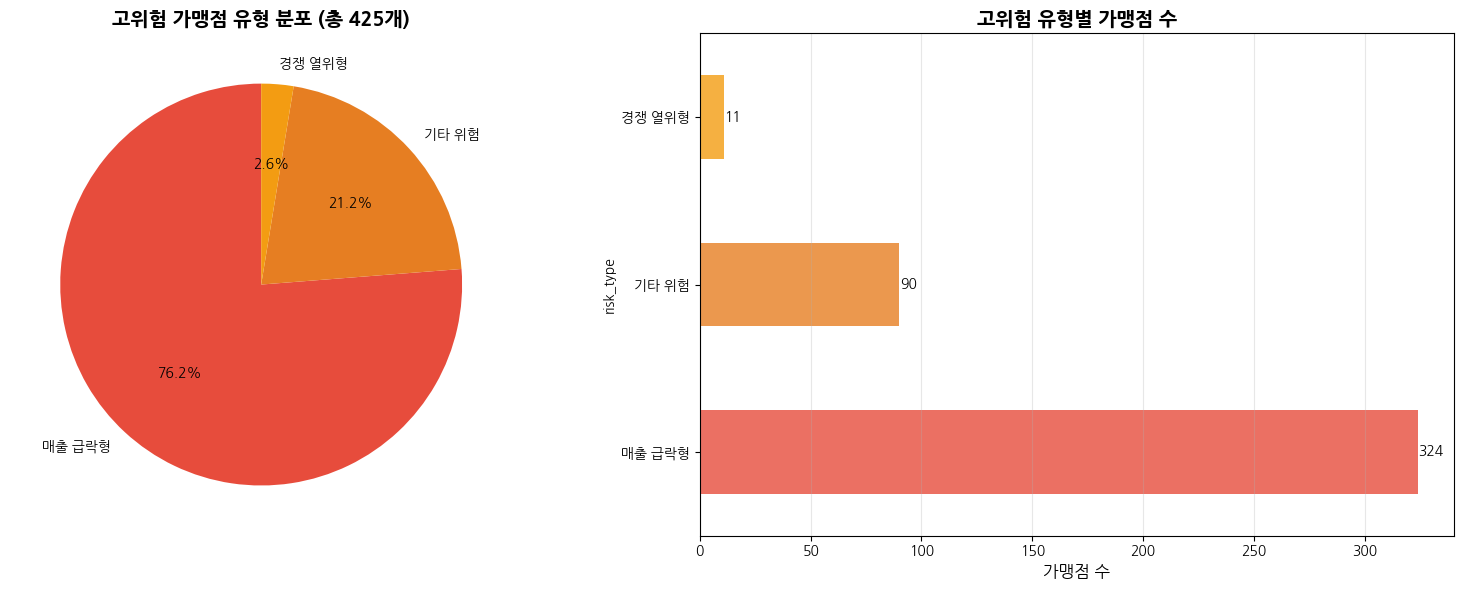

‚úÖ Saved: ../data/results/risk_type_distribution.png


In [32]:
# Ï∂úÎ†• ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± (ÏãúÍ∞ÅÌôî Ï†ÄÏû•Ïö©)
output_dir = Path('../data/results')
output_dir.mkdir(exist_ok=True)

# ÏãúÍ∞ÅÌôî 1: ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÌè¨ (Í≥†ÏúÑÌóò Ïú†ÌòïÎßå)
print("=" * 100)
print("VISUALIZATION: High-Risk Types Only (excluding 'Ï†ïÏÉÅ')")
print("=" * 100)

# Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†êÎßå ÌïÑÌÑ∞ÎßÅ
df_high_risk = df_risk[df_risk['risk_type'] != 'Ï†ïÏÉÅ'].copy()
print(f"\nÏ¥ù Í∞ÄÎßπÏ†ê: {len(df_risk):,}")
print(f"Ï†ïÏÉÅ: {(df_risk['risk_type'] == 'Ï†ïÏÉÅ').sum():,} ({(df_risk['risk_type'] == 'Ï†ïÏÉÅ').sum() / len(df_risk) * 100:.1f}%)")
print(f"Í≥†ÏúÑÌóò: {len(df_high_risk):,} ({len(df_high_risk) / len(df_risk) * 100:.1f}%)\n")

if len(df_high_risk) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Pie chart - Í≥†ÏúÑÌóò Ïú†ÌòïÎßå
    risk_type_counts = df_high_risk['risk_type'].value_counts()
    colors = ['#e74c3c', '#e67e22', '#f39c12', '#3498db', '#9b59b6', '#95a5a6']
    axes[0].pie(risk_type_counts, labels=risk_type_counts.index, autopct='%1.1f%%',
                colors=colors[:len(risk_type_counts)], startangle=90)
    axes[0].set_title(f'Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê Ïú†Ìòï Î∂ÑÌè¨ (Ï¥ù {len(df_high_risk):,}Í∞ú)', fontsize=14, fontweight='bold')
    
    # Bar chart - Í≥†ÏúÑÌóò Ïú†ÌòïÎßå
    risk_type_counts.plot(kind='barh', ax=axes[1], color=colors[:len(risk_type_counts)], alpha=0.8)
    axes[1].set_xlabel('Í∞ÄÎßπÏ†ê Ïàò', fontsize=12)
    axes[1].set_title('Í≥†ÏúÑÌóò Ïú†ÌòïÎ≥Ñ Í∞ÄÎßπÏ†ê Ïàò', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(risk_type_counts):
        axes[1].text(v + 0.2, i, f'{v:,}', va='center')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'risk_type_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"‚úÖ Saved: {output_dir / 'risk_type_distribution.png'}")
else:
    print("‚ö†Ô∏è No high-risk merchants to visualize")

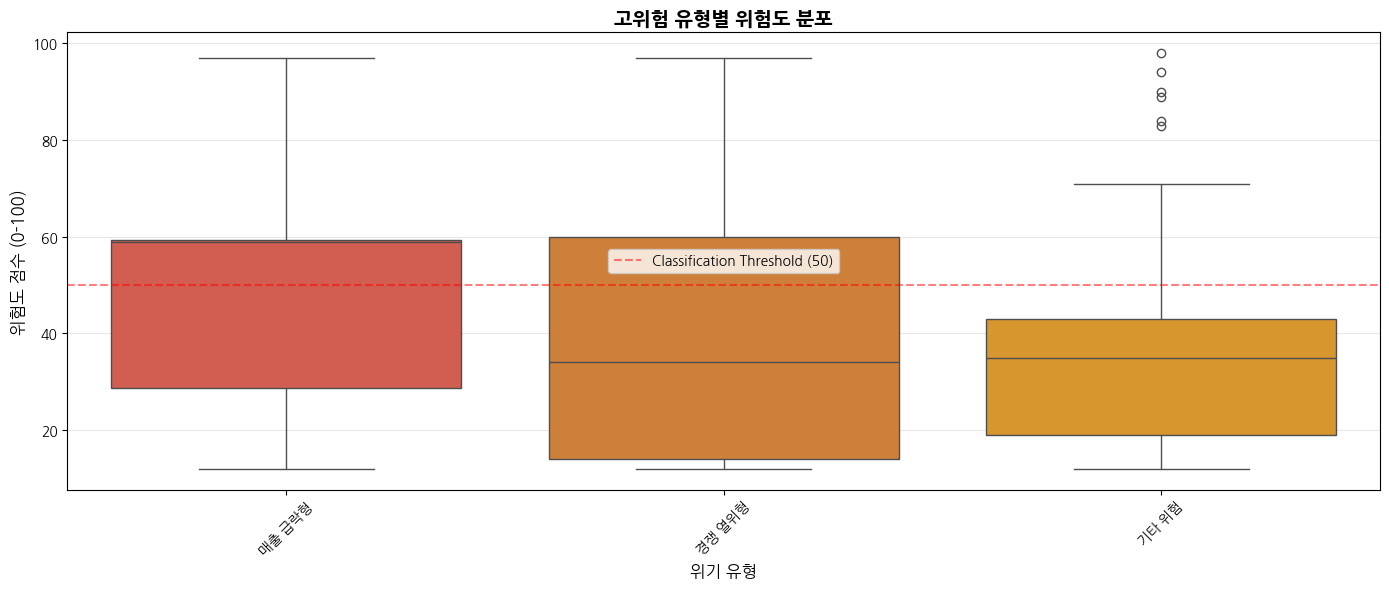

‚úÖ Saved: ../data/results/risk_type_score_distribution.png


In [33]:
# ÏãúÍ∞ÅÌôî 2: Ïú†ÌòïÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÌè¨ (Boxplot - Í≥†ÏúÑÌóò Ïú†ÌòïÎßå)
if len(df_high_risk) > 0:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Ïú†ÌòïÎ≥Ñ Ï†ïÎ†¨ (ÌèâÍ∑† ÏúÑÌóòÎèÑ ÎÜíÏùÄ Ïàú)
    type_order = df_high_risk.groupby('risk_type')['risk_score'].mean().sort_values(ascending=False).index
    
    sns.boxplot(data=df_high_risk, x='risk_type', y='risk_score', order=type_order,
                palette=colors[:len(type_order)], ax=ax)
    ax.set_xlabel('ÏúÑÍ∏∞ Ïú†Ìòï', fontsize=12)
    ax.set_ylabel('ÏúÑÌóòÎèÑ Ï†êÏàò (0-100)', fontsize=12)
    ax.set_title('Í≥†ÏúÑÌóò Ïú†ÌòïÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÌè¨', fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    
    # ÏûÑÍ≥ÑÍ∞í ÌëúÏãú
    ax.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='Classification Threshold (50)')
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(output_dir / 'risk_type_score_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"‚úÖ Saved: {output_dir / 'risk_type_score_distribution.png'}")
else:
    print("‚ö†Ô∏è No high-risk merchants to visualize")

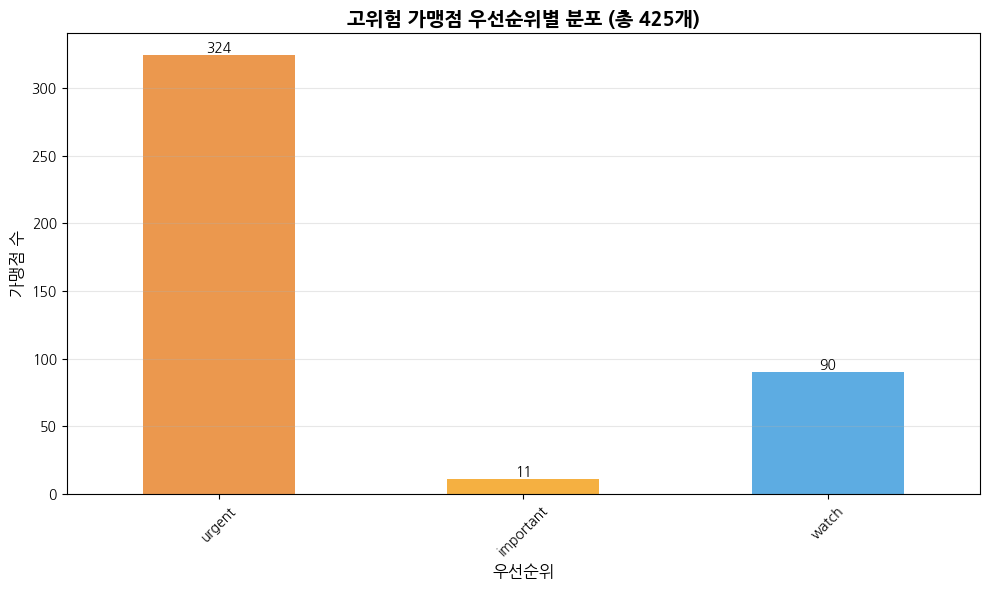

‚úÖ Saved: ../data/results/priority_distribution.png

HIGH-RISK SUMMARY
Total Merchants: 4,058
  - Ï†ïÏÉÅ (< 50): 3,633 (89.5%)
  - Í≥†ÏúÑÌóò (>= 50): 425 (10.5%)

High-Risk Breakdown by Priority:
  - urgent    : 324 ( 76.2%)
  - important :  11 (  2.6%)
  - watch     :  90 ( 21.2%)


In [34]:
# ÏãúÍ∞ÅÌôî 3: Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Î∂ÑÌè¨ (Í≥†ÏúÑÌóòÎßå)
if len(df_high_risk) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†êÏùò Ïö∞ÏÑ†ÏàúÏúÑÎßå
    high_risk_priority = df_high_risk['priority'].value_counts()
    priority_order_filtered = [p for p in ['critical', 'urgent', 'important', 'watch'] if p in high_risk_priority.index]
    high_risk_priority = high_risk_priority.reindex(priority_order_filtered)
    
    priority_colors = {'critical': '#e74c3c', 'urgent': '#e67e22', 'important': '#f39c12',
                      'watch': '#3498db', 'normal': '#95a5a6'}
    colors_list = [priority_colors[p] for p in priority_order_filtered]
    
    high_risk_priority.plot(kind='bar', ax=ax, color=colors_list, alpha=0.8)
    ax.set_xlabel('Ïö∞ÏÑ†ÏàúÏúÑ', fontsize=12)
    ax.set_ylabel('Í∞ÄÎßπÏ†ê Ïàò', fontsize=12)
    ax.set_title(f'Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Î∂ÑÌè¨ (Ï¥ù {len(df_high_risk):,}Í∞ú)', fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(high_risk_priority):
        ax.text(i, v + 0.5, f'{v:,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'priority_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"‚úÖ Saved: {output_dir / 'priority_distribution.png'}")
    
    # ÌÜµÍ≥Ñ ÏöîÏïΩ
    print(f"\n" + "=" * 100)
    print("HIGH-RISK SUMMARY")
    print("=" * 100)
    print(f"Total Merchants: {len(df_risk):,}")
    print(f"  - Ï†ïÏÉÅ (< 50): {(df_risk['risk_type'] == 'Ï†ïÏÉÅ').sum():,} ({(df_risk['risk_type'] == 'Ï†ïÏÉÅ').sum() / len(df_risk) * 100:.1f}%)")
    print(f"  - Í≥†ÏúÑÌóò (>= 50): {len(df_high_risk):,} ({len(df_high_risk) / len(df_risk) * 100:.1f}%)")
    print(f"\nHigh-Risk Breakdown by Priority:")
    for priority in priority_order_filtered:
        count = high_risk_priority[priority]
        pct = count / len(df_high_risk) * 100
        print(f"  - {priority:10s}: {count:3,} ({pct:5.1f}%)")
else:
    print("‚ö†Ô∏è No high-risk merchants to visualize")

## 9. Í≤∞Í≥º Ï†ÄÏû•

In [35]:
# Í≤∞Í≥º Ï†ÄÏû• (output_dirÏùÄ Ïù¥ÎØ∏ ÏãúÍ∞ÅÌôî ÏÑπÏÖòÏóêÏÑú ÏÉùÏÑ±Îê®)

# 1. Ï†ÑÏ≤¥ Î∂ÑÎ•ò Í≤∞Í≥º Ï†ÄÏû•
df_risk_full = df_risk.sort_values('risk_score', ascending=False)
df_risk_full.to_csv(output_dir / 'risk_classification_results.csv', index=False, encoding='utf-8-sig')
print(f"‚úÖ Saved: {output_dir / 'risk_classification_results.csv'}")
print(f"   Total merchants: {len(df_risk_full):,}")

# 2. Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥Ñ Ï†ÄÏû•
risk_type_statistics = {
    'summary': {
        'total_merchants': int(len(df_risk)),
        'prediction_date': str(latest_month),
        'risk_types': list(df_risk['risk_type'].unique())
    },
    'type_distribution': df_risk['risk_type'].value_counts().to_dict(),
    'priority_distribution': df_risk['priority'].value_counts().to_dict(),
    'type_statistics': {}
}

for risk_type in df_risk['risk_type'].unique():
    type_data = df_risk[df_risk['risk_type'] == risk_type]
    risk_type_statistics['type_statistics'][risk_type] = {
        'count': int(len(type_data)),
        'avg_risk_score': float(type_data['risk_score'].mean()),
        'median_risk_score': float(type_data['risk_score'].median()),
        'avg_closure_probability': float(type_data['closure_probability'].mean()),
        'avg_confidence': float(type_data['classification_confidence'].mean())
    }

with open(output_dir / 'risk_type_statistics.json', 'w', encoding='utf-8') as f:
    json.dump(risk_type_statistics, f, indent=2, ensure_ascii=False)
print(f"‚úÖ Saved: {output_dir / 'risk_type_statistics.json'}")

# 3. Ïú†ÌòïÎ≥Ñ ÏÜîÎ£®ÏÖò Ï†ÄÏû•
with open(output_dir / 'risk_type_solutions.json', 'w', encoding='utf-8') as f:
    json.dump(risk_solution_map, f, indent=2, ensure_ascii=False)
print(f"‚úÖ Saved: {output_dir / 'risk_type_solutions.json'}")

# 4. Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê Î¶¨Ïä§Ìä∏ (Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ)
high_risk_by_priority = {}
for priority in ['critical', 'urgent', 'important']:
    priority_merchants = df_risk[df_risk['priority'] == priority].sort_values('risk_score', ascending=False)
    high_risk_by_priority[priority] = priority_merchants[[
        'ENCODED_MCT', 'HPSN_MCT_BZN_CD_NM', 'risk_score', 'risk_type', 'classification_confidence'
    ]].head(50).to_dict('records')

with open(output_dir / 'high_risk_by_priority.json', 'w', encoding='utf-8') as f:
    json.dump(high_risk_by_priority, f, indent=2, ensure_ascii=False)
print(f"‚úÖ Saved: {output_dir / 'high_risk_by_priority.json'}")

print("\n" + "=" * 80)
print("RISK CLASSIFICATION COMPLETED")
print("=" * 80)
print(f"\nTotal Active Merchants: {len(df_risk):,}")
print(f"\nRisk Type Distribution:")
for risk_type, count in df_risk['risk_type'].value_counts().items():
    pct = count / len(df_risk) * 100
    print(f"  {risk_type:20s}: {count:5,} ({pct:5.1f}%)")
print(f"\nHigh Risk Merchants:")
for priority in ['critical', 'urgent', 'important']:
    count = (df_risk['priority'] == priority).sum()
    print(f"  {priority:10s}: {count:5,}")
print(f"\nResults saved to: {output_dir}")

‚úÖ Saved: ../data/results/risk_classification_results.csv
   Total merchants: 4,058
‚úÖ Saved: ../data/results/risk_type_statistics.json
‚úÖ Saved: ../data/results/risk_type_solutions.json
‚úÖ Saved: ../data/results/high_risk_by_priority.json

RISK CLASSIFICATION COMPLETED

Total Active Merchants: 4,058

Risk Type Distribution:
  Ï†ïÏÉÅ                  : 3,633 ( 89.5%)
  Îß§Ï∂ú Í∏âÎùΩÌòï              :   324 (  8.0%)
  Í∏∞ÌÉÄ ÏúÑÌóò               :    90 (  2.2%)
  Í≤ΩÏüÅ Ïó¥ÏúÑÌòï              :    11 (  0.3%)

High Risk Merchants:
  critical  :     0
  urgent    :   324
  important :    11

Results saved to: ../data/results


## 10. Í≤∞Î°†

### ÏôÑÎ£åÎêú ÏûëÏóÖ
- ‚úÖ All Interval Features Î™®Îç∏Î°ú ÌèêÏóÖ ÏúÑÌóòÎèÑ ÏòàÏ∏°
- ‚úÖ 142Í∞ú Interval Pattern Features Í∏∞Î∞ò **5Í∞ÄÏßÄ ÏúÑÍ∏∞ Ïú†Ìòï** ÏûêÎèô Î∂ÑÎ•ò
- ‚úÖ Ïú†ÌòïÎ≥Ñ Ïö∞ÏÑ†ÏàúÏúÑ Î∂ÄÏó¨ (critical/urgent/important/watch/normal)
- ‚úÖ Ïú†ÌòïÎ≥Ñ ÎßûÏ∂§Ìòï ÏÜîÎ£®ÏÖò Îß§Ïπ≠
- ‚úÖ Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥Ñ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
- ‚úÖ Í≤∞Í≥º Ï†ÄÏû• (CSV, JSON)

### Ï†ÄÏû•Îêú ÌååÏùº
1. `risk_classification_results.csv`: Ï†ÑÏ≤¥ Í∞ÄÎßπÏ†ê ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÎ•ò Í≤∞Í≥º
2. `risk_type_statistics.json`: Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ
3. `risk_type_solutions.json`: Ïú†ÌòïÎ≥Ñ ÎßûÏ∂§Ìòï ÏÜîÎ£®ÏÖò Îß§Ìïë
4. `high_risk_by_priority.json`: Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê Î¶¨Ïä§Ìä∏
5. `risk_type_distribution.png`: Ïú†Ìòï Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
6. `risk_type_score_distribution.png`: Ïú†ÌòïÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÌè¨
7. `priority_distribution.png`: Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Î∂ÑÌè¨

### ÌôúÏö© Î∞©Ïïà
1. **ÎßûÏ∂§Ìòï Í∞úÏûÖ**: Ïú†ÌòïÎ≥ÑÎ°ú ÏµúÏ†ÅÌôîÎêú Í∏àÏúµÏÉÅÌíà Î∞è ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû® Ï†úÍ≥µ
2. **Ïö∞ÏÑ†ÏàúÏúÑ Í¥ÄÎ¶¨**: Critical/Urgent Í∞ÄÎßπÏ†êÏóê Î¶¨ÏÜåÏä§ ÏßëÏ§ë Î∞∞Î∂Ñ
3. **ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨**: Watch Îì±Í∏â Í∞ÄÎßπÏ†ê Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅÏúºÎ°ú ÏúÑÍ∏∞ ÏòàÎ∞©
4. **ÏÑ±Í≥º Ï∏°Ï†ï**: Í∞úÏûÖ ÌõÑ Ïú†ÌòïÎ≥Ñ ÌöåÎ≥µÎ•† Ï∂îÏ†Å Î∞è Ï†ÑÎûµ Í∞úÏÑ†
5. **Ï†ïÏ±Ö ÏàòÎ¶Ω**: Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥ÑÎ•º Î∞îÌÉïÏúºÎ°ú ÏßÄÏó≠ ÏÉÅÍ∂å Ï†ïÏ±Ö ÏàòÎ¶Ω